In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error,
                             mean_absolute_error)

from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor,SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
avo= pd.read_csv('avocado.csv', parse_dates=['Date']).drop('Unnamed: 0', axis=1)
avo.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


###### Performing EDA

In [3]:
# adding Total Sales column
avo['Total Sales'] = (avo['AveragePrice']*avo['Total Volume'])
avo.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Sales
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880


In [4]:
# checking shape of data
avo.shape

(1517, 14)

In [5]:
# checking data information
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
Date            1517 non-null datetime64[ns]
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
Total Sales     1517 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 166.0+ KB


In [6]:
# checking null value
avo.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Total Sales     0
dtype: int64

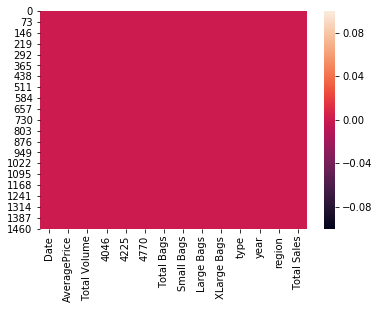

In [7]:
# heatmap of null value
sns.heatmap(avo.isnull())

In [8]:
# checking the data description
avo.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Total Sales
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1.517000e+03
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,1.604454e+06
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,4.437315e+06
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,4.334288e+04
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,1.633328e+05
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,4.360582e+05
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.110544e+05
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,3.974336e+07


In [9]:
# corelation between coloums
avo.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Total Sales
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.096318
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.996247
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.978172
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.985523
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.934061
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.968391
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.963884
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.896627
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.527085
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,0.001230


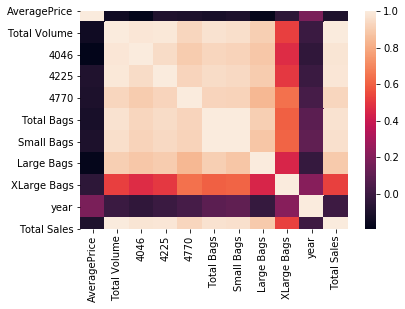

In [10]:
# heat map of corelation
sns.heatmap(avo.corr())

In [11]:
#transform dates into columns for year month day
# feature engineer date so we can use the specifics in our ML model
avo['Date']=pd.to_datetime(avo['Date'])
avo['Month']=avo['Date'].apply(lambda x:x.month)
avo['Day']=avo['Date'].apply(lambda x:x.day)

Text(0.5, 1.0, 'Average Price')

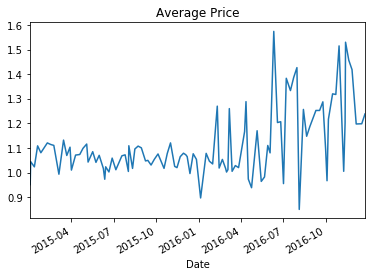

In [12]:
#fluctuation in average price over the year
byDate=avo.groupby('Date').mean()
byDate['AveragePrice'].plot()
plt.title('Average Price')

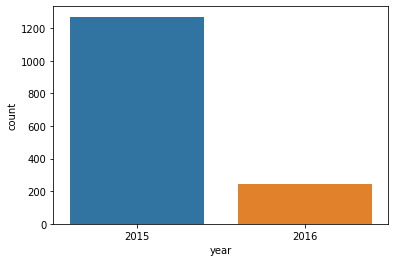

In [13]:
# creating bar plot of year to check the count of indivisual value
sns.countplot(x='year',data=avo)

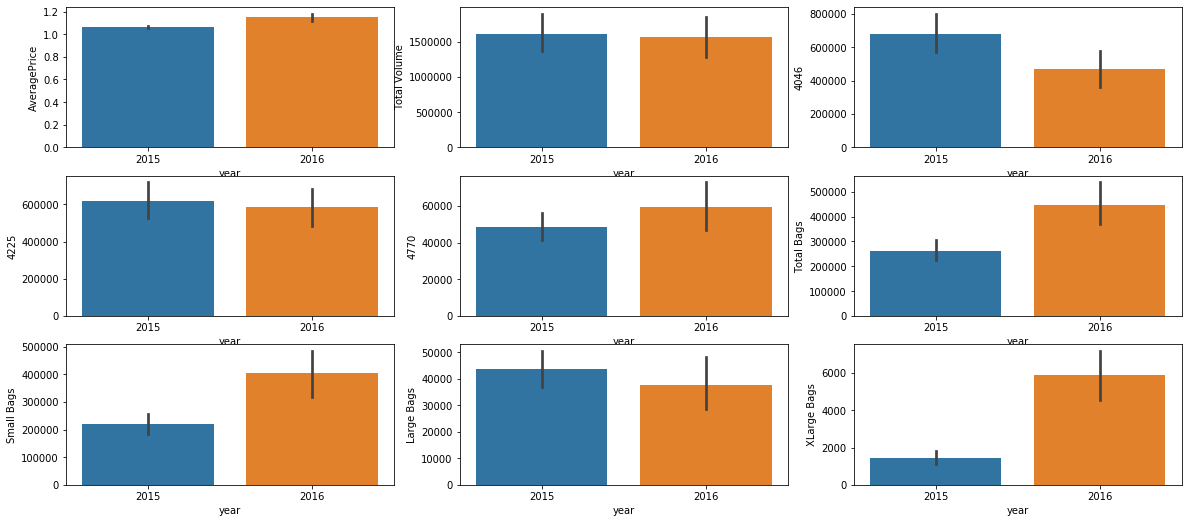

In [14]:
# creating bar plot of colums with respect to year to check distribution among year
year = avo[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(year.columns):
    if column == 'year':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(x='year', y=column, data=year)

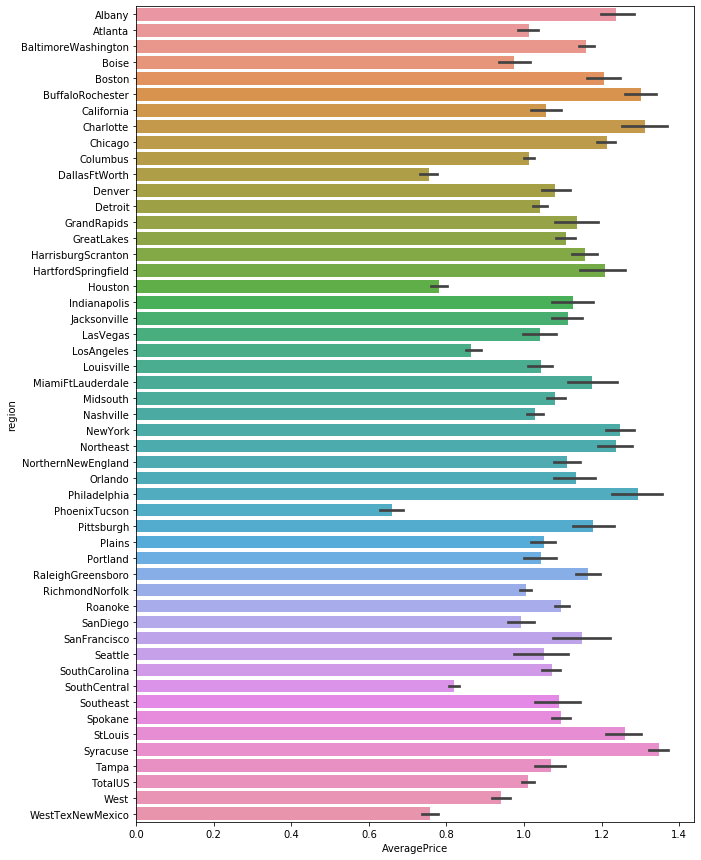

In [15]:
#distribution of average price over region via boxplot
plt.figure(figsize=(10,15))
sns.barplot(x='AveragePrice', y='region', data=avo)

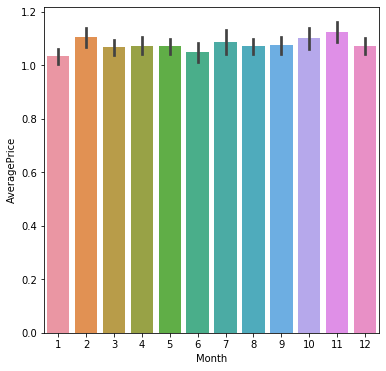

In [16]:
#distribution of average price over Month via boxplot
plt.figure(figsize=(6,6))
sns.barplot(x='Month', y='AveragePrice', data=avo)

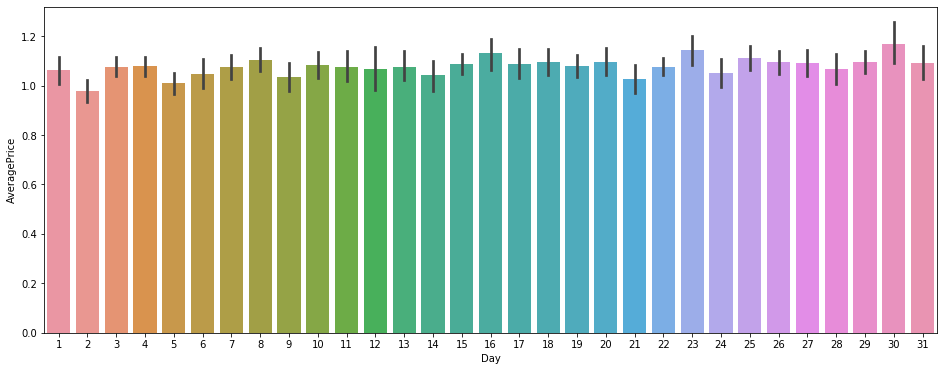

In [17]:
#distribution of average price over Day via boxplot
plt.figure(figsize=(16,6))
sns.barplot(x='Day', y='AveragePrice', data=avo)

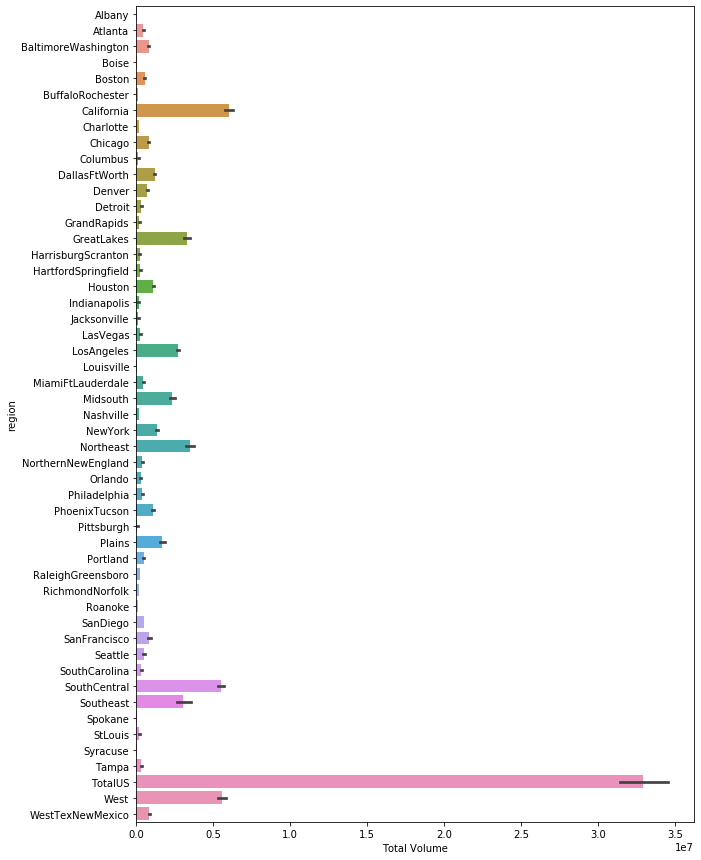

In [18]:
#distribution of Total Volume over region via boxplot
plt.figure(figsize=(10,15))
sns.barplot(x='Total Volume', y='region', data=avo)

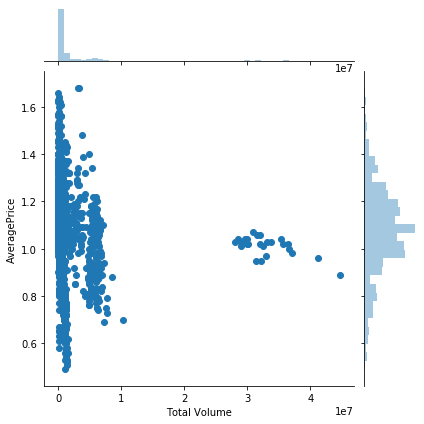

In [19]:
#distribution of Total Volume and AveragePrice 
sns.jointplot(x='Total Volume', y='AveragePrice', data=avo)

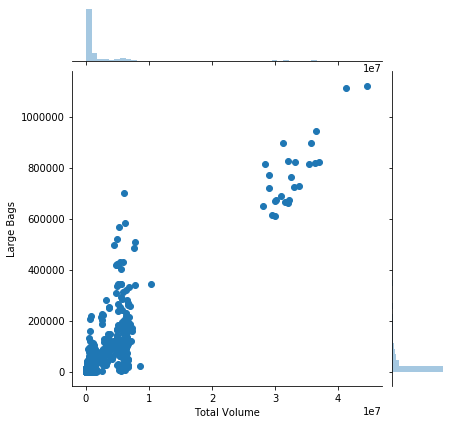

In [20]:
#distribution of Total Volume and Large Bags 
sns.jointplot(x='Total Volume', y='Large Bags', data=avo)

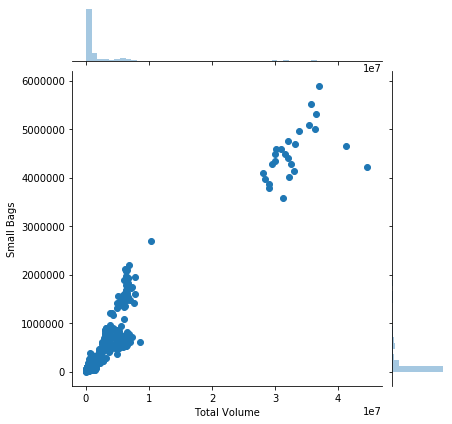

In [21]:
#distribution of Total Volume and Small Bags 
sns.jointplot(x='Total Volume', y='Small Bags', data=avo)

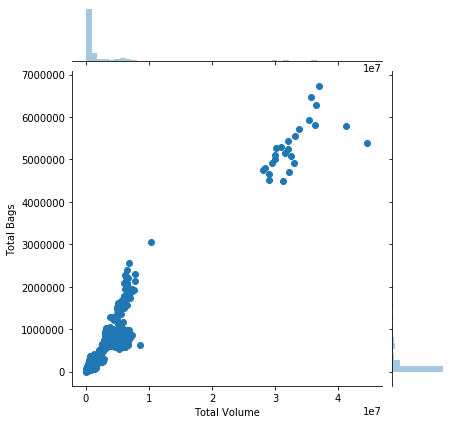

In [22]:
#distribution of Total Volume and Total Bags 
sns.jointplot(x='Total Volume', y='Total Bags', data=avo)

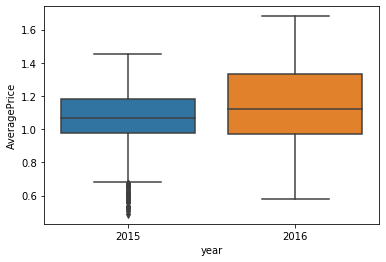

In [23]:
# Creating boxplot of average price over year
sns.boxplot(x='year', y='AveragePrice', data=avo)

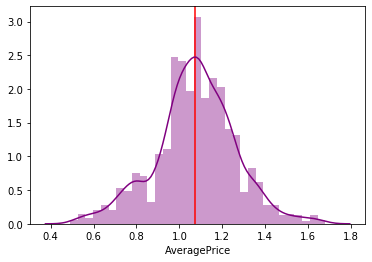

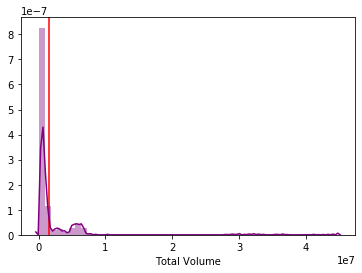

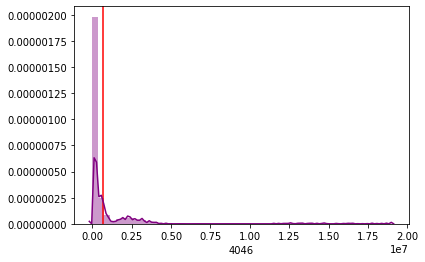

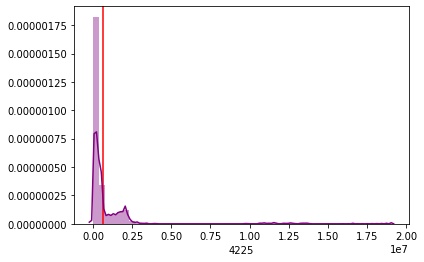

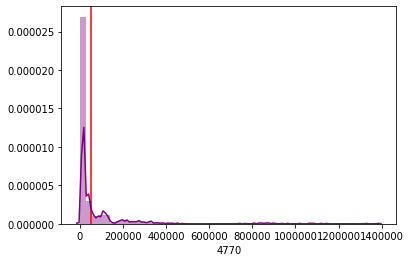

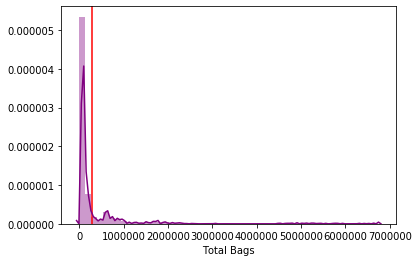

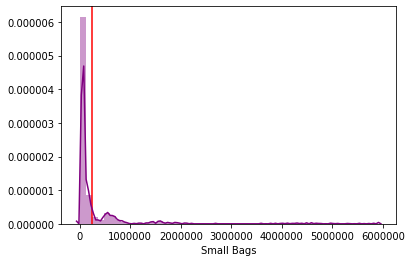

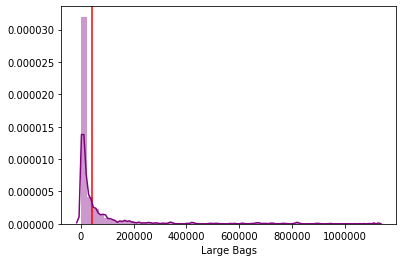

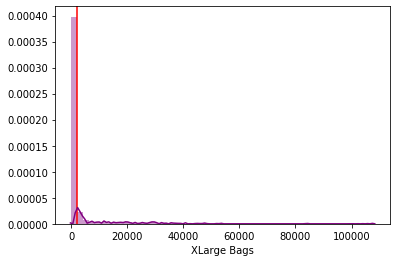

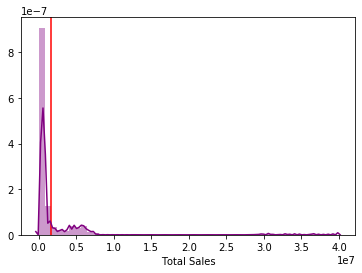

In [24]:
# Histogram - Distribution plot for all continous variables to visualize skewness
dist = avo[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags',
            'Total Sales']]

for i,col in enumerate(dist):
    plt.figure(i)
    plt.axvline(dist[col].mean(),color = 'r')
    sns.distplot(dist[col],color='purple')

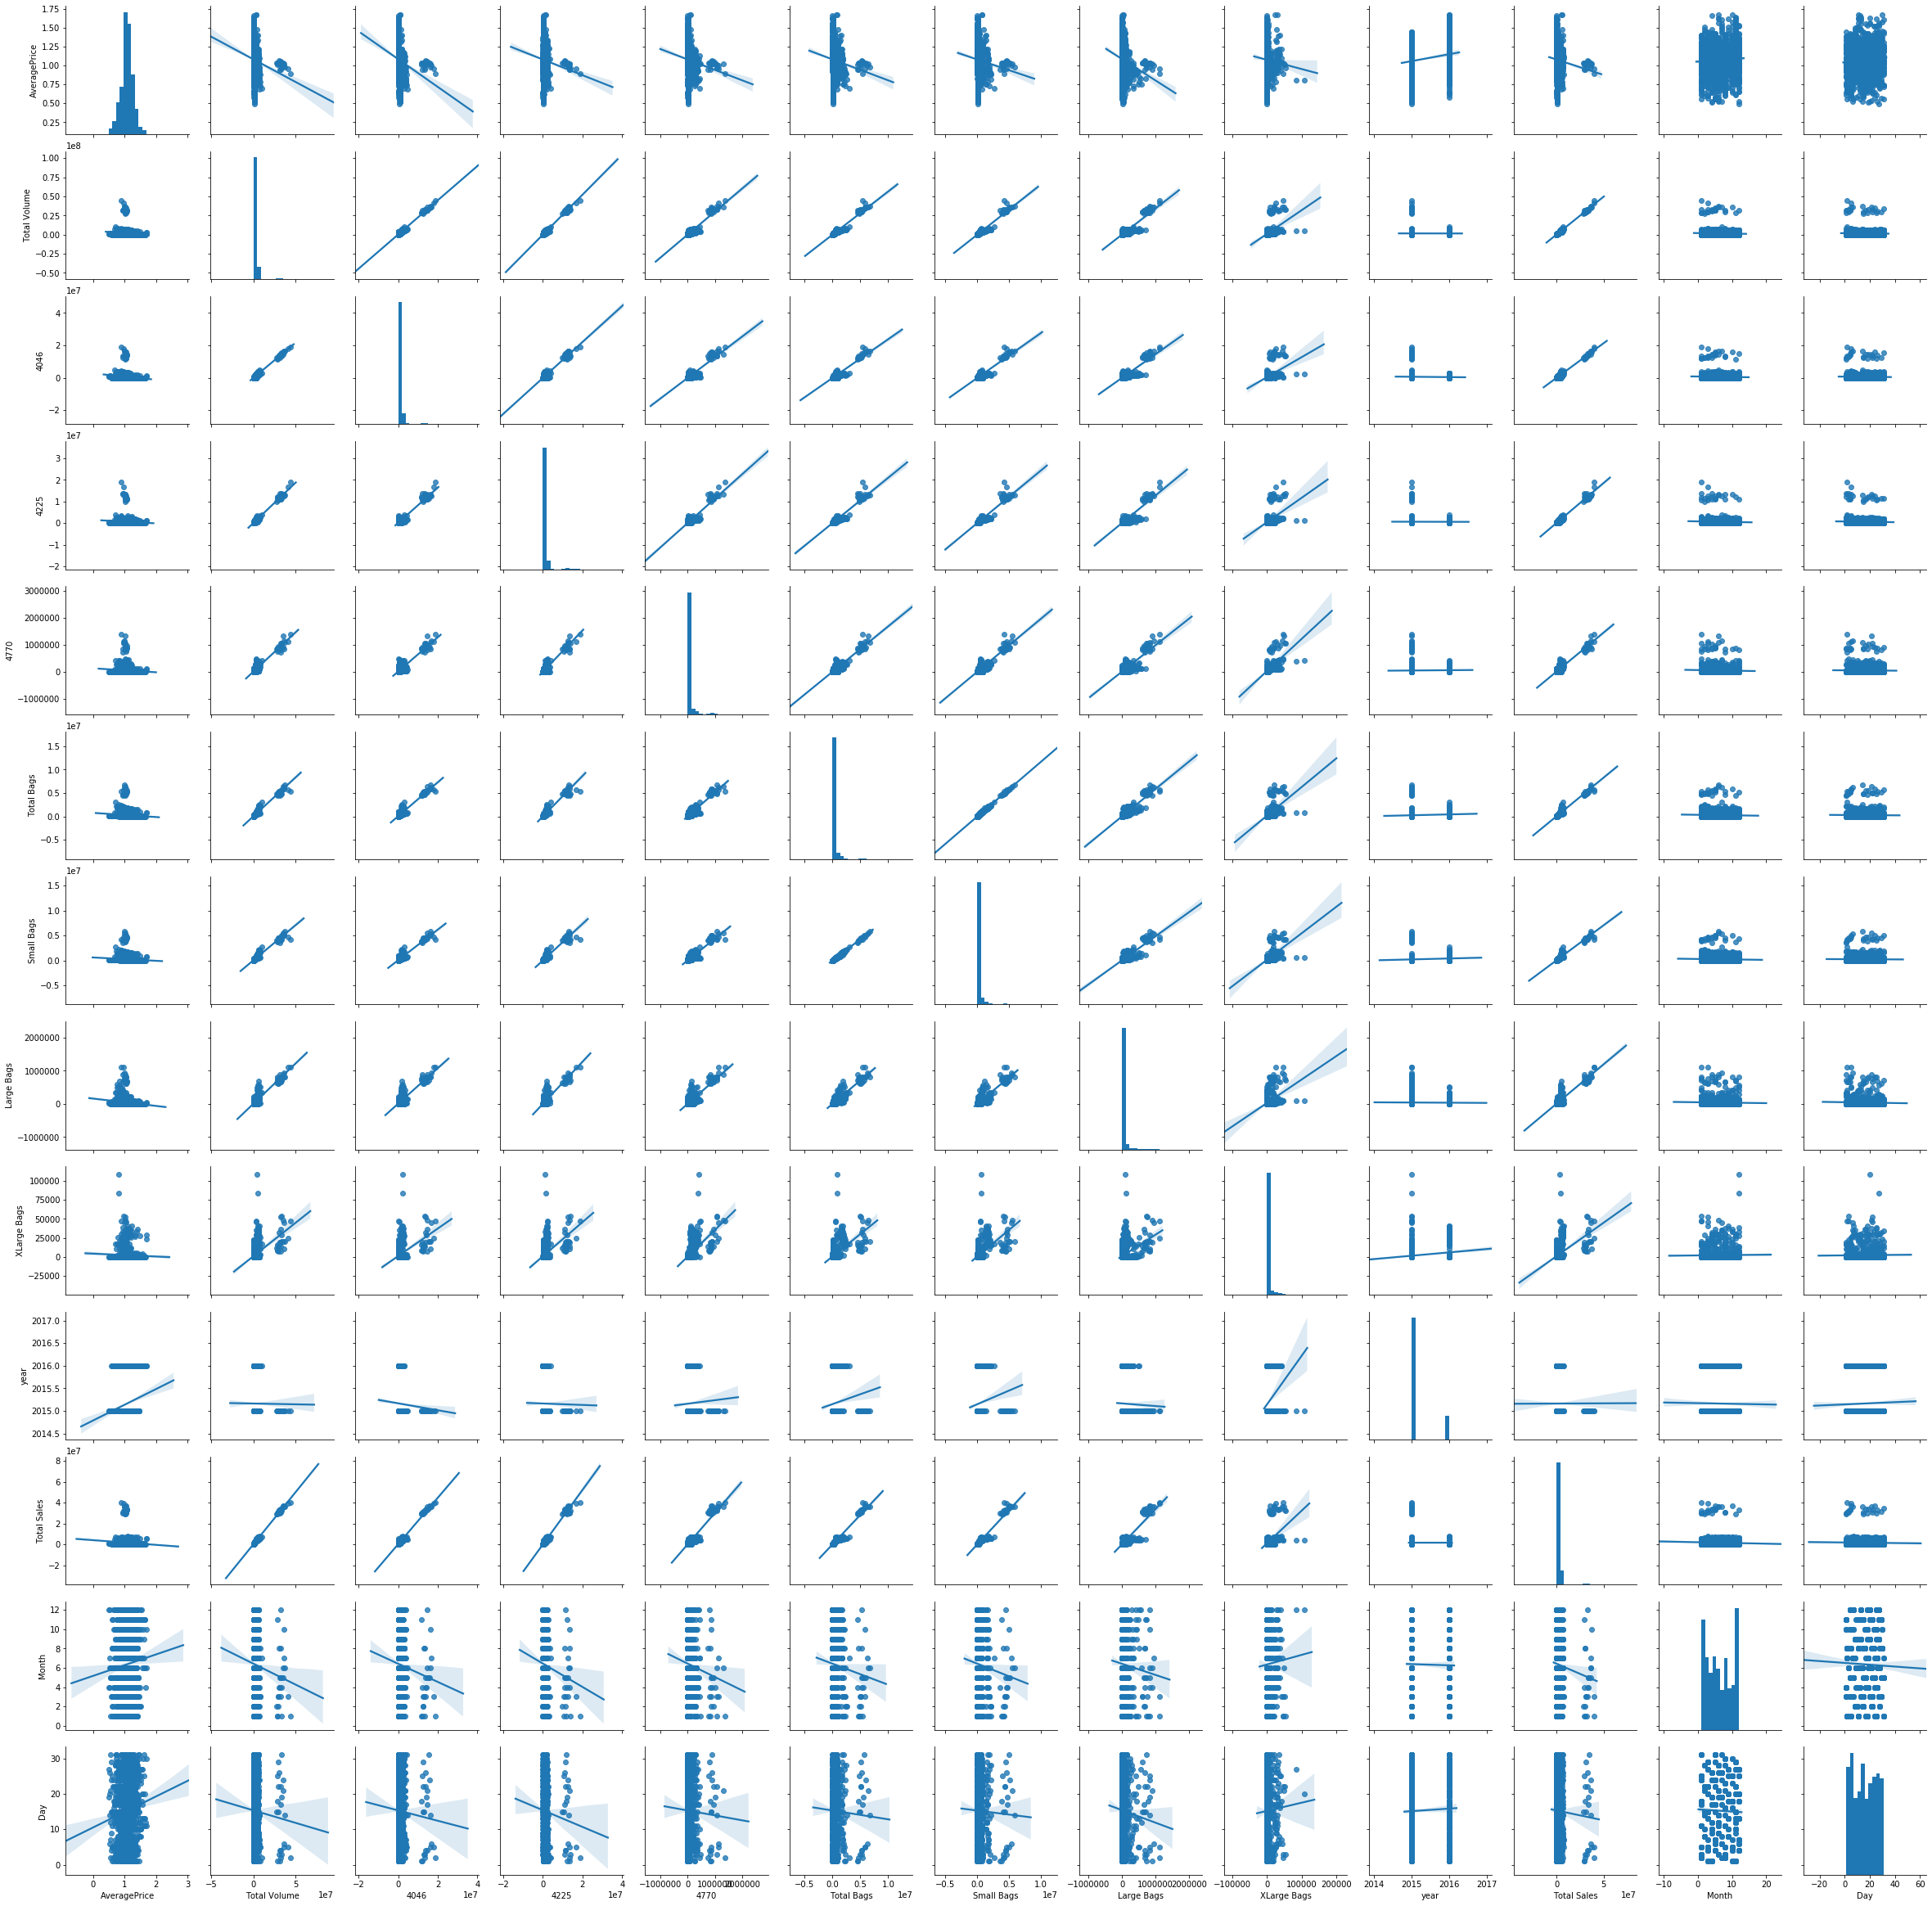

In [25]:
# pair plot to see the scatter of data
sns.pairplot(avo, kind='reg')

In [26]:
#dropping date table since this can not be used because of its data type
avo=avo.drop(['Date'], axis=1)

AveragePrice       AxesSubplot(0.125,0.772143;0.227941x0.107857)
Total Volume    AxesSubplot(0.398529,0.772143;0.227941x0.107857)
4046            AxesSubplot(0.672059,0.772143;0.227941x0.107857)
4225               AxesSubplot(0.125,0.642714;0.227941x0.107857)
4770            AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Total Bags      AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Small Bags         AxesSubplot(0.125,0.513286;0.227941x0.107857)
Large Bags      AxesSubplot(0.398529,0.513286;0.227941x0.107857)
XLarge Bags     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
year               AxesSubplot(0.125,0.383857;0.227941x0.107857)
Total Sales     AxesSubplot(0.398529,0.383857;0.227941x0.107857)
Month           AxesSubplot(0.672059,0.383857;0.227941x0.107857)
Day                AxesSubplot(0.125,0.254429;0.227941x0.107857)
dtype: object

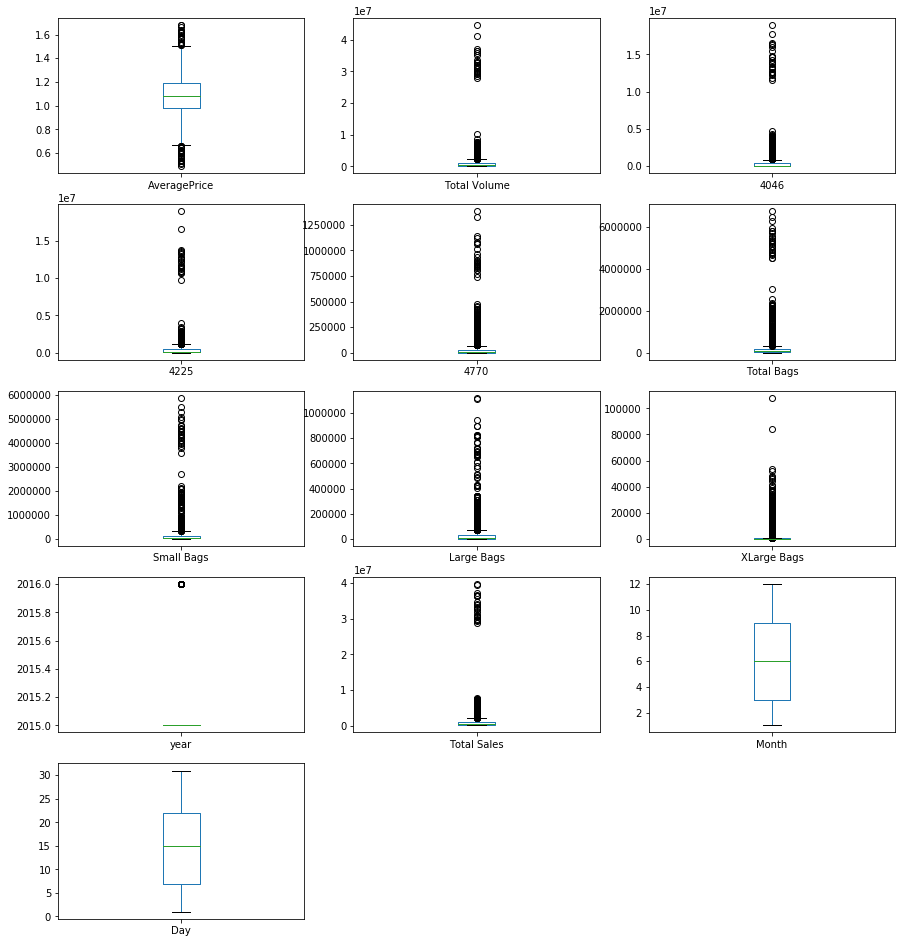

In [27]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
avo.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

### Bulding the regression model where target variable is 'AveragePrice'

###### Manipulating data before bulding the model

In [28]:
#Label encoding data
avo['Region']=avo['AveragePrice'].apply(lambda x: 'overprice'if x>avo['AveragePrice'].mean() else 'affordable')
avo_r=pd.get_dummies(avo.drop(['region'],axis=1),drop_first=True)
avo_r.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Total Sales,Month,Day,Region_overprice
251,1.03,97235.60,40352.94,22858.09,16653.11,17371.46,12106.21,4115.58,1149.67,2015,1.001527e+05,11,29,0
1232,0.98,6749081.20,3328637.80,2304907.45,155862.52,959673.43,767183.44,192422.82,67.17,2015,6.614100e+06,5,7,0
1386,1.08,673496.13,7708.04,461424.99,72848.75,131514.35,129466.02,142.22,1906.11,2016,7.273758e+05,5,29,1
325,1.03,719792.51,118578.11,491584.39,7264.83,102365.18,54092.42,48272.76,0.00,2015,7.413863e+05,8,3,0
1113,1.32,186936.02,96530.89,37553.09,37.30,52814.74,52814.74,0.00,0.00,2015,2.467555e+05,5,17,1


In [29]:
#removing skewness
for col in avo_r.columns:
    while avo_r.skew().loc[col]>0.55:
        if col == 'year':
            break
        avo_r[col]=np.log1p(avo_r[col])
for col in avo_r.columns:       
     while avo_r.skew().loc[col]<-0.55:
        avo_r[col]=np.power(avo_r[col],2)
avo_r.skew()

AveragePrice       -0.109444
Total Volume        0.442500
4046               -0.160268
4225                0.184436
4770               -0.355508
Total Bags          0.368284
Small Bags          0.409053
Large Bags          0.166210
XLarge Bags         0.348073
year                1.828332
Total Sales         0.483515
Month               0.101439
Day                 0.041303
Region_overprice   -0.059413
dtype: float64

In [30]:
#removing outlires
zr=abs(zscore(avo_r))
print(avo_r.shape)
avo_r=avo_r.loc[(zr<3).all(axis=1)]
print(avo_r.shape)

(1517, 14)
(1512, 14)


In [31]:
# dividing dataset into input values 'x' and output value 'y'
xr=avo_r.iloc[:,1:]
yr=avo_r['AveragePrice']
print('xr dataset\n',xr.sample(5),'\n')
print('yr datase\n',yr.sample(5))
print(xr.shape)
print(yr.shape)

xr dataset
      Total Volume       4046       4225       4770  Total Bags  Small Bags  \
351      2.619422  11.877074  10.846461  11.286919    2.487722    2.469227   
458      2.711308  13.537425  12.857427   7.982167    2.540667    2.476237   
119      2.692565  11.066734  13.293794  10.786136    2.597193    2.595922   
133      2.490448  10.740525   8.567736   8.773107    2.273743    2.273635   
200      2.802218  14.888352  14.316058  12.035275    2.654132    2.651317   

     Large Bags  XLarge Bags  year  Total Sales  Month  Day  Region_overprice  
351   50.720058     2.332865  2015     2.625680      6    9                 1  
458  122.870878     0.000000  2015     2.689237      5   31                 0  
119   67.367262     1.988639  2015     2.698383      6   14                 1  
133    0.000000     1.099106  2015     2.499796      8   16                 1  
200   96.538869     2.195793  2015     2.806877      5   17                 1   

yr datase
 1307    1.13
333     1.09


In [32]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
xr=scale.fit_transform(xr)

###### Bulding and comparing multipe regression model, to find out the best model

In [33]:
#creating models array with all the model
Models_r=[('Ridge',Ridge()),('Lasso',Lasso()),('ElasticNet',ElasticNet()),('DecisionTreeRegressor',DecisionTreeRegressor()),
        ('GradientBoostingRegressor',GradientBoostingRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('SGDRegressor',SGDRegressor()),('LinearRegression',LinearRegression()),('KNeighborsRegressor',KNeighborsRegressor())]

In [34]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array_r=[]
Random_state_r=[]
Max_r2score_array=[]
for name,model in Models_r:
    max_r2score=0    
    for random_state in range(10,99):
        train_xr,test_xr,train_yr,test_yr=train_test_split(xr,yr,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_xr,train_yr)
        pred_r=model.predict(test_xr)
        
        r2score=r2_score(test_yr,pred_r)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state_r=random_state
    
    Model_array_r.append(name)
    Random_state_r.append(best_random_state_r)
    Max_r2score_array.append(max_r2score)

In [35]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array_r,'R2 score': Max_r2score_array,'Random state': Random_state_r})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
7,LinearRegression,0.988934,42
0,Ridge,0.978222,46
5,RandomForestRegressor,0.906791,75
4,GradientBoostingRegressor,0.889730,95
3,DecisionTreeRegressor,0.849980,86
8,KNeighborsRegressor,0.840760,74
6,SGDRegressor,0.719268,79
1,Lasso,0.000000,46
2,ElasticNet,0.000000,46


###### Conclusion
On basis of r2 score LinearRegression model is performing the best with maximum r2 score

In [36]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
Cross_val_score_array_r=[]
Standard_Deviation_r=[]
for name, model in Models_r:
    kf=KFold(n_splits=10,random_state=5)
    cscore_r=cross_val_score(model,xr,yr,cv=kf,scoring='r2')
    Cross_val_score_array_r.append(cscore_r.mean())
    Standard_Deviation_r.append(cscore_r.std())

In [37]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance_r = pd.DataFrame({'Model': Model_array_r,'Cross val Acuracy': Cross_val_score_array_r,
                                            'Standard Deviation': Standard_Deviation_r})
model_cross_val_performance_r.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
7,LinearRegression,0.975306,0.019377
0,Ridge,0.959224,0.030752
4,GradientBoostingRegressor,0.628047,0.174927
5,RandomForestRegressor,0.561437,0.243406
6,SGDRegressor,0.549864,0.080980
8,KNeighborsRegressor,0.443810,0.251797
3,DecisionTreeRegressor,0.383397,0.309177
1,Lasso,-0.224287,0.175501
2,ElasticNet,-0.224287,0.175501


###### Conclusion
On basis of Crossval score for r2 LinearRegression model is performing the best with maximum Crossval score

###### On basis of our compression of r2 score and Cross val score i choose LinearRegression model since it performing best on given data

In [38]:
# applying grid search for improving the model
kfoldr =KFold(n_splits=10,random_state=42)
param_grid={'copy_X':[True,False], 'fit_intercept':[True,False], 'n_jobs':range(-5,-3,1), 'normalize':[True,False]}
mod=LinearRegression()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=kfoldr,n_jobs=4)
grid_result=grid.fit(xr,yr)

In [39]:
grid_result.best_score_

0.9753142464873789

In [40]:
grid_result.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -5, 'normalize': False}

In [41]:
grid_result.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-5, normalize=False)

In [42]:
# final model for regression
lr=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-5, normalize=False)

train_xr,test_xr,train_yr,test_yr=train_test_split(xr,yr,test_size=.20,random_state=42,shuffle=True)
lr.fit(train_xr,train_yr)
pred_r=lr.predict(test_xr)
score_r=cross_val_score(lr,xr,yr,cv=10,scoring='r2').mean()

print('Model score',lr.score(train_xr,train_yr),'\n')
print('R2 score of model is :' ,r2_score(test_yr,pred_r),'\n')
print('The mean of cross_val_score for the model is:',score_r,'\n')
print('Model cofficient\n',lr.coef_,'\n')
print('Model intercept',lr.intercept_,'\n')
print('Mean absolute error for model is : ',mean_absolute_error(test_yr,pred_r),'\n')
print('Mean squared error for model is : ',mean_squared_error(test_yr,pred_r),'\n')
print('Root mean squared error for model is : ',np.sqrt(mean_squared_error(test_yr,pred_r)),'\n')

Model score 0.9836767551662157 

R2 score of model is : 0.9889343519157718 

The mean of cross_val_score for the model is: 0.975306049768862 

Model cofficient
 [-1.31589615e+00 -7.98386321e-03 -9.50814943e-03 -3.92974093e-03
  5.08323471e-04 -4.70723880e-03 -2.94343576e-03 -8.94302590e-04
  6.16293034e-03  1.28892517e+00  9.08033220e-04  3.40965206e-04
  9.92125920e-03] 

Model intercept 1.0748953537000059 

Mean absolute error for model is :  0.013289014318090252 

Mean squared error for model is :  0.00034398497975649293 

Root mean squared error for model is :  0.01854683206794338 



In [43]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred_r, columns=['prediction_r']).to_csv('Project 8 Avocado regression.csv')

In [44]:
# saving the model using pickle.
joblib.dump(lr,'lr_Project 8 Avocado regression.pkl')

['lr_Project 8 Avocado regression.pkl']

### Bulding the classification model where target variable is 'region'

###### Manipulating data before bulding the model

In [45]:
#droping type column since it have only 1 unique value 
avo_c=avo.drop(['type'], axis=1)
avo_c.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Total Sales,Month,Day,Region
62,1.09,349072.48,228710.28,59731.79,291.22,60339.19,36884.35,23454.84,0.00,2015,Atlanta,3.804890e+05,10,18,overprice
664,1.37,1251919.24,20811.41,923816.05,2324.14,304967.64,256581.76,48382.38,3.50,2015,NewYork,1.715129e+06,7,19,overprice
108,1.24,734721.29,48455.25,458207.46,42754.34,185304.24,181968.79,3158.90,176.55,2015,BaltimoreWashington,9.110544e+05,8,30,overprice
805,0.60,1159509.68,938840.55,143378.43,5938.72,71351.98,71344.45,7.53,0.00,2015,PhoenixTucson,6.957058e+05,2,15,affordable
111,1.16,821523.45,56362.75,557363.94,42933.87,164862.89,161564.81,3298.08,0.00,2015,BaltimoreWashington,9.529672e+05,9,8,overprice


In [46]:
# changing region to catagorical variable and lable encoding it
avo_c['region'] = avo_c['region'].astype('category',copy=False)
le=LabelEncoder()
avo_c['region']=le.fit_transform(avo_c['region'])
avo_c.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Total Sales,Month,Day,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,85434.7046,12,27,overprice
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,74083.9230,12,20,overprice
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,109944.8046,12,13,affordable
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,85311.5220,6,12,overprice
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,65330.6880,11,29,overprice


In [47]:
# dividing dataset into input values 'xc' and output value 'yc'
xc=avo_c[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year',
          'Total Sales']]
print('xc dataset\n',xc.head(),'\n')
yc=avo_c['region']
print('yc datase\n',yc.sample(5))
print(xc.shape)
print(yc.shape)

xc dataset
    AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  Total Sales  
0     8603.62       93.25          0.0  2015   85434.7046  
1     9408.07       97.49          0.0  2015   74083.9230  
2     8042.21      103.14          0.0  2015  109944.8046  
3     5677.40      133.76          0.0  2015   85311.5220  
4     5986.26      197.69          0.0  2015   65330.6880   

yc datase
 231     8
584    23
913    37
916    37
915    37
Name: region, dtype: int32
(1517, 11)
(1517,)


In [48]:
#checking skewness
xc.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Total Sales     6.220221
dtype: float64

In [49]:
#removing skewness
for col in xc.columns:
    while xc.skew().loc[col]>0.55:
        if col == 'year':
            break
        xc[col]=np.log1p(xc[col])
for col in xc.columns:       
     while xc.skew().loc[col]<-0.55:
        xc[col]=np.power(xc[col],2)
xc.skew()

AveragePrice   -0.109444
Total Volume    0.442500
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.368284
Small Bags      0.409053
Large Bags      0.166210
XLarge Bags     0.348073
year            1.828332
Total Sales     0.483515
dtype: float64

In [50]:
# standardizes the data in xc using standerd scaler technique
scale=StandardScaler()
xc=scale.fit_transform(xc)

###### Bulding and comparing multipe classification model, to find out the best model

In [51]:
#creating models array with all the model
Models_c=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [52]:
# loop to find out the maximum accuracy of all the model in models array along the range of random state
Model_array_c=[]
Random_state_c=[]
Max_accuracy_array=[]
for name,model in Models_c:
    max_accuracy=0    
    for random_state_c in range(10,99):
        train_xc,test_xc,train_yc,test_yc=train_test_split(xc,yc,test_size=.2,random_state=random_state_c,stratify=yc,shuffle=True)
        model.fit(train_xc,train_yc)
        pred_c=model.predict(test_xc)
        
        accuracy=accuracy_score(test_yc,pred_c)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state_c=random_state_c
    
    Model_array_c.append(name)
    Random_state_c.append(best_random_state_c)
    Max_accuracy_array.append(max_accuracy)

In [53]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array_c,'Accuracy': Max_accuracy_array,'Random state': Random_state_c})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
7,RandomForestClassifier,0.976974,23
8,KNeighborsClassifier,0.967105,30
6,LinearDiscriminantAnalysis,0.953947,96
0,SVC,0.947368,33
4,DecisionTreeClassifier,0.937500,63
1,GaussianNB,0.930921,45
5,GradientBoostingClassifier,0.930921,21
9,QuadraticDiscriminantAnalysis,0.888158,88
2,SGDClassifier,0.838816,22
3,LogisticRegression,0.838816,78


###### Conclusion
On basis of accuracy RandomForestClassifier model is performing the best with maximum accuracy score

In [54]:
# loop to find out the cross_val_score of all the model in models array along the range of random state
Cross_val_score_array_c=[]
Standard_Deviation_c=[]
for name, model in Models_c:
    cscore_c=cross_val_score(model,xc,yc,cv=10,scoring='accuracy')
    Cross_val_score_array_c.append(cscore_c.mean())
    Standard_Deviation_c.append(cscore_c.std())

In [55]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance_c = pd.DataFrame({'Model': Model_array_c,'Cross val Acuracy': Cross_val_score_array_c,
                                            'Standard Deviation': Standard_Deviation_c})
model_cross_val_performance_c.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
7,RandomForestClassifier,0.935521,0.033223
8,KNeighborsClassifier,0.929463,0.033169
0,SVC,0.916040,0.037857
6,LinearDiscriminantAnalysis,0.907695,0.045312
1,GaussianNB,0.886869,0.074546
5,GradientBoostingClassifier,0.876848,0.044645
4,DecisionTreeClassifier,0.856975,0.055026
3,LogisticRegression,0.796427,0.048452
2,SGDClassifier,0.770829,0.049672
9,QuadraticDiscriminantAnalysis,0.031780,0.002573


###### Conclusion
On basis of Crossval score for accuracy RandomForestClassifier model is performing the best with maximum Crossval score

###### On basis of our compression of accuracy and Cross val score i choose RandomForestClassifier model since it performing best on given data

In [56]:
#using grid search to improve model..
param_grid={'bootstrap':[True,False],'max_features':['auto','sqrt'],'min_samples_split':[2,3,4],'max_depth':[11,15,17],
            'n_estimators':[100,200,300],'min_samples_leaf':[2,3,4]}
mod=RandomForestClassifier()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=3)
grid_result=grid.fit(xc,yc)

In [57]:
grid_result.best_score_

0.95385629531971

In [58]:
grid_result.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [59]:
grid_result.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
#final classification model
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

train_xc,test_xc,train_yc,test_yc=train_test_split(xc,yc,test_size=.20,random_state=23,shuffle=True)
rfc.fit(train_xc,train_yc)
pred_c=rfc.predict(test_xc)
score_c=cross_val_score(rfc,train_xc,train_yc,cv=10,scoring='accuracy').mean()

print('Model score is:',rfc.score(train_xc,train_yc),'\n')
print('Accuracy score of model is : ',accuracy_score(test_yc,pred_c),'\n')
print('The mean of cross_val_score for themodel is:',score_c,'\n')
print('Confusion matrix for themodel is : \n',confusion_matrix(test_yc,pred_c),'\n')
print('Classification report for the model is : \n',classification_report(test_yc,pred_c),'\n')

Model score is: 0.9991755976916735 

Accuracy score of model is :  0.9671052631578947 

The mean of cross_val_score for themodel is: 0.9654608157032556 

Confusion matrix for themodel is : 
 [[13  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  5]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        11
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00        14
           7       0.83      0.83      0.83         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00        10
          10 

In [61]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred_c, columns=['prediction']).to_csv('Project 8 Avocado classification.csv')

In [62]:
# saving the model using pickle.
joblib.dump(rfc,'rfc_Project 8 Avocado classification.pkl')

['rfc_Project 8 Avocado classification.pkl']